In [23]:
# Abdul Qadir Boxwala
# 0801CS201003


# Q1. Import iris dataset using sklearn and pandas

import pandas as pd
from sklearn.datasets import load_iris

iris= load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [7]:
# Q2. Apply pandas method head and describe

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
# Q3. Apply preprocessing
# Q4. Split dataset attributes into two features values(X) and target values(Y)
# Q5. Split dataset into traing and testing set

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Create a variable for the feature data
X = iris.data
# Create a variable for the target data
y = iris.target

# Random split the data into four new datasets, training features, training outcome, test features, 
# and test outcome. Set the size of the test data to be 30% of the full dataset.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Load the standard scaler
sc = StandardScaler()
# Compute the mean and standard deviation based on the training data
sc.fit(X_train)
# Scale the training data to be of mean 0 and of unit variance
X_train_std = sc.transform(X_train)
# Scale the test data to be of mean 0 and of unit variance
X_test_std = sc.transform(X_test)

# Feature Test Data, non-standardized
X_test[0:5]

array([[6.1, 2.8, 4.7, 1.2],
       [5.7, 3.8, 1.7, 0.3],
       [7.7, 2.6, 6.9, 2.3],
       [6. , 2.9, 4.5, 1.5],
       [6.8, 2.8, 4.8, 1.4]])

In [11]:
# Feature Test Data, standardized.
X_test_std[0:5]

array([[ 0.3100623 , -0.50256349,  0.484213  , -0.05282593],
       [-0.17225683,  1.89603497, -1.26695916, -1.27039917],
       [ 2.23933883, -0.98228318,  1.76840592,  1.43531914],
       [ 0.18948252, -0.26270364,  0.36746819,  0.35303182],
       [ 1.15412078, -0.50256349,  0.54258541,  0.2177459 ]])

LR: 0.692703 (0.066813)
LDA: 0.694002 (0.061501)
KNN: 0.673240 (0.049108)
CART: 0.653794 (0.055891)
NB: 0.713551 (0.056782)
SVM: 0.687526 (0.054524)


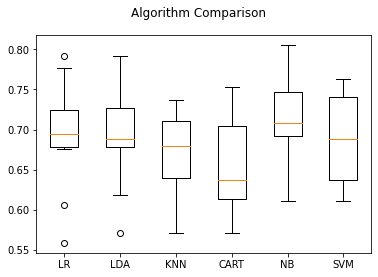

In [22]:
# Q6. Apply ML algos using sklearn
# Q7. Compare them by finding accuracy
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# load dataset
names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
dataframe = pandas.read_csv(url,names=names)
array = dataframe.values
X = array[:,0:3]
Y = array[:,3]
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()